# Project Case Scenario

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
boston_df=pd.read_csv("boston_housing.csv")
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [14]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [15]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## TASK 4

### 1. BoxPlot

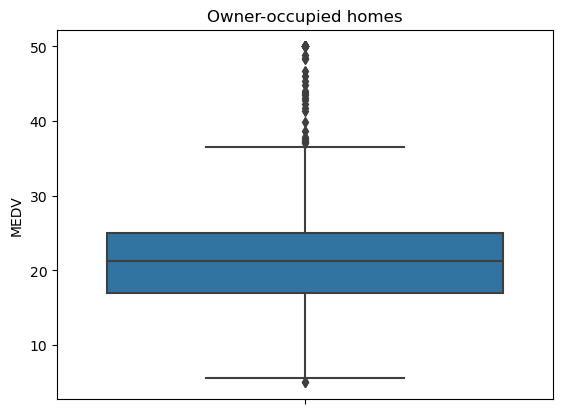

In [16]:
sns.boxplot(y="MEDV", data=boston_df)
plt.title("Owner-occupied homes")
plt.show()

###### Conclusion:
The Median value of owner-occupied homesis ~ 22 and the data is left skewed

### 2. Bar plot 

In [17]:
boston_df["CHAS"].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

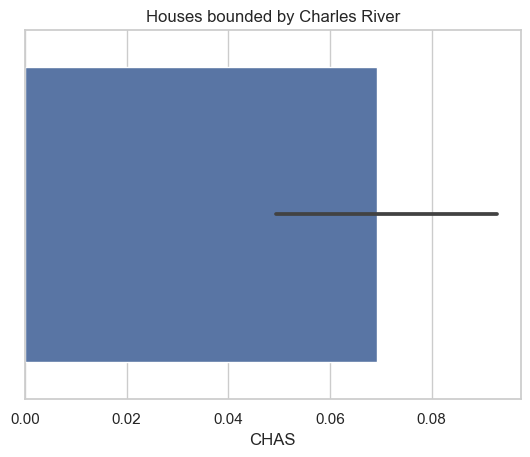

In [28]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", data=boston_df)
plt.title("Houses bounded by Charles River")
plt.show()

###### Conclusion:
The graph shows the number of houses that bounds Charles River 


### 3. Boxplot for the MEDV variable vs the AGE variable


In [52]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

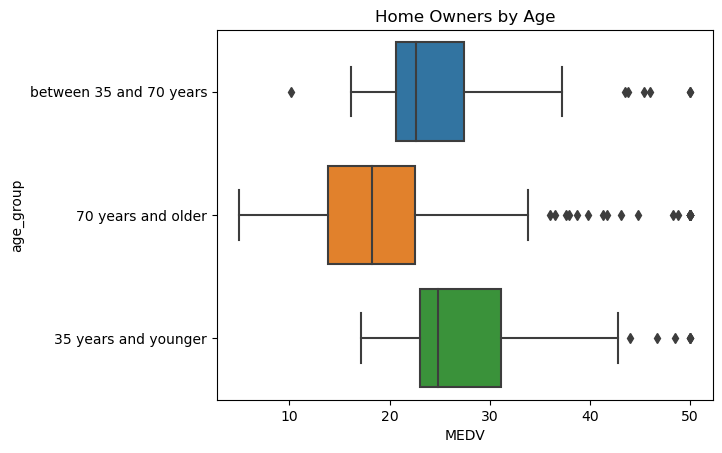

In [53]:
sns.boxplot(data=boston_df, x="MEDV", y="age_group")
plt.title("Home Owners by Age")
plt.show()

###### Conclusion:
The median value of the younger age group is higher compared to other medians. 

### 4. Scatter Plot

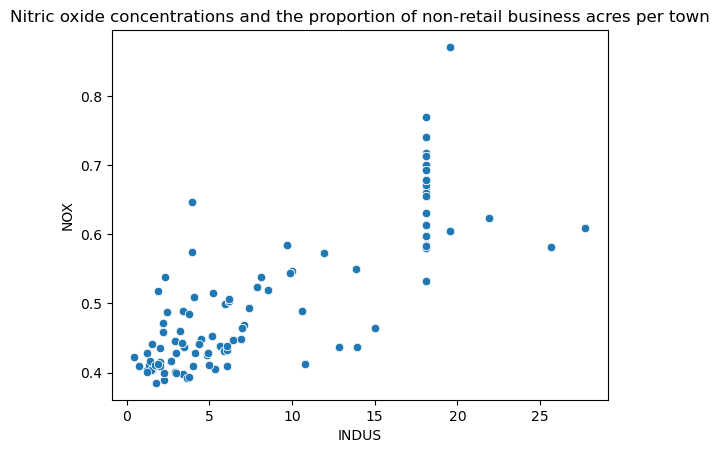

In [56]:
sns.scatterplot(data=boston_df, y="NOX", x="INDUS")
plt.title("Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()

###### Conclusion:
There is a possitive correlation. The highter the non-retail businesses in town, the more ther's concentration of nitric oxide

### 5. Histogram 

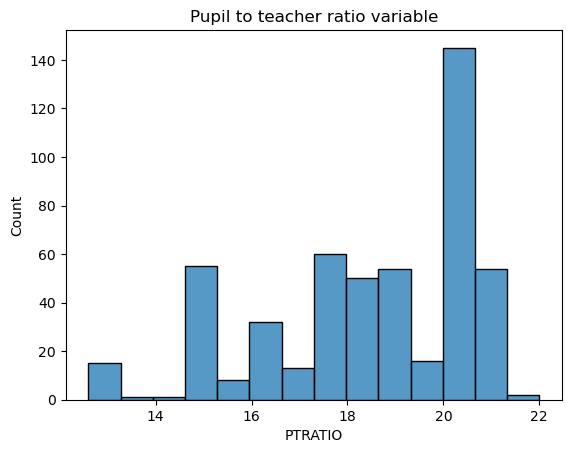

In [57]:
sns.histplot(data=boston_df, x='PTRATIO')
plt.title("Pupil to teacher ratio variable")
plt.show()

###### Conclusion:
Most of the data is spread between 0 and 22. The data is left skewed, therefore the mean < median < mode.

## Task 5

### 1. T-test

###### State the hypothesis:
H_0: there is no difference in median value of houses bounded and not bounded by the Charles river

H_1: there is a difference in median value of houses bounded and not bounded by the Charles river

In [96]:
boston_df.loc[(boston_df['CHAS'] == 0), 'area_bounds'] = 'no'
boston_df.loc[(boston_df['CHAS'] == 1), 'area_bounds'] = 'yes'

In [97]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,area_bounds
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,no
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,no
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,no
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,no
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,no


In [98]:
scipy.stats.ttest_ind(boston_df[boston_df['area_bounds'] == 'no']['MEDV'], 
                      boston_df[boston_df['area_bounds'] == 'yes']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

###### Conclusion:
The p-value is < 0.05, and we reject the null hypothesis. Therefore there is a difference in median value of houses bounded and not bounded by the Charles river 

### 2. ANOVA

## 1st Option

###### State the hypothesis:
H_0: there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
                
H_1: there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [99]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [104]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [106]:
model = ols('MEDV ~ AGE', data=boston_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
AGE,6069.761065,1.0,83.477459,1.569982e-18
Residual,36646.534350,504.0,NaN,NaN


In [ ]:
Since the p-values for AGE is <0.05, this means that AGE has a statistically significant effect on Median values of houses.

In [110]:
model = ols('AGE ~ MEDV', data=boston_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
MEDV,56857.931746,1.0,83.477459,1.569982e-18
Residual,343283.059499,504.0,NaN,NaN


## 2nd Option

###### Levene's Test - test for equality of variance

In [107]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [108]:
thirtyfive_lower_eval = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_eval = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older_eval = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [109]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_eval, thirtyfive_seventy_eval, seventy_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


###### Conclusion:
In both options, p-value <0.05. We therefore reject the null hypothesis

### 3. Pearson Correlation

###### State the hypothesis:
H_0: Nitric oxide concentrations is not correlated with the proportion of non-retail business acres per town

H_1: Nitric oxide concentrations is correlated with the proportion of non-retail business acres per town

In [113]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061240043e-98)

###### Conclusion:
Since the p-value < 0.05, we reject the Null hypothesis and conclude that there Nitric oxide concentrations is correlated with the proportion of non-retail business acres per town. The scatter plot also supports this conclusion

### 4. Regression analysis

###### State the hypothesis:
H_0: Additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes

H_1: Additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes

In [10]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        11:54:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Conclusion

The p-value is <0.05, so we reject the null hypothesis as there is evidence that there is a difference in Median value of owner-occupied homes based on weighted distances to five Boston employment centres. 


<Axes: xlabel='DIS', ylabel='MEDV'>

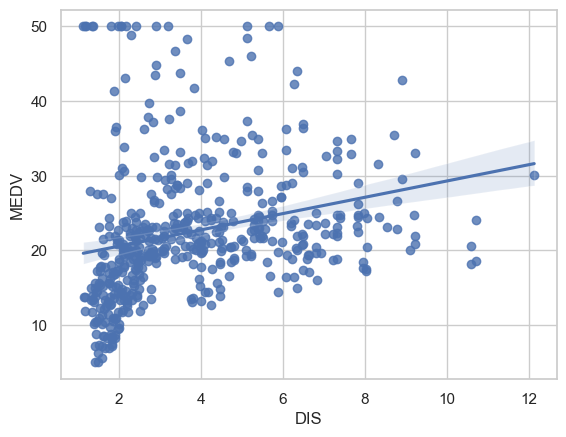

In [34]:
sns.regplot(x="DIS", y="MEDV", data=boston_df)